In [44]:
# imports general modules, runs ipython magic commands
# change path in this notebook to point to repo locally
# n.b. sometimes need to run this cell twice to init the plotting paramters
%run ./setup_notebook.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import copy
import utils.utils_funcs as uf

In [46]:
def consec_check(lst, n_trials):
    if len(lst) <= 3:
        return True
    if lst[-1] == n_trials-1 and lst[-2] == n_trials-2 and lst[-3]== n_trials-3:
        return False
    else:
        return True

In [47]:
def get_trial_idxs(n_trials_total):

    easy_idx = []
    nogo_idx = []
    test_idx = []

    n_trials = 0

    while n_trials < n_trials_total:
        n_trials += 1
        ttype = np.random.choice(['easy', 'nogo', 'test_idx'])
        if ttype == 'easy' and consec_check(easy_idx, n_trials):
            easy_idx.append(n_trials)
        elif ttype == 'nogo' and consec_check(nogo_idx, n_trials):
            nogo_idx.append(n_trials)
        elif ttype =='test_idx' and consec_check(test_idx, n_trials):
            test_idx.append(n_trials)
        else:
            n_trials -= 1

    return easy_idx, nogo_idx, test_idx

In [48]:
def simulate_behaviour(window_size, hit_rate=0.5, fp_rate=0.5, dp_threshold=1, plot=False):  
    
    n_trials_total = 500
    
    easy_idx, nogo_idx, test_idx = get_trial_idxs(n_trials_total)

    go_outcome = np.zeros(len(easy_idx))
    n_hits = int(len(go_outcome) * hit_rate)
    go_outcome[:n_hits] = 1
    np.random.shuffle(go_outcome)

    nogo_outcome = np.zeros(len(nogo_idx))
    n_fp = int(len(nogo_outcome) * fp_rate)
    nogo_outcome[:n_fp] = 1
    np.random.shuffle(nogo_outcome)
    running_go = np.convolve(go_outcome, np.ones(
        (window_size,))/window_size, mode='same')
    running_nogo = np.convolve(nogo_outcome, np.ones(
        (window_size,))/window_size, mode='same')
    
        

    running_go = np.interp(np.arange(n_trials_total), easy_idx, running_go)
    running_nogo = np.interp(np.arange(n_trials_total), nogo_idx, running_nogo)
    running_dp = np.array([uf.d_prime(go, fp) for go, fp in zip(running_go, running_nogo)])
    if window_size == 3 and plot:
        plt.plot(running_dp)

    return len(np.where(running_dp > dp_threshold)[0]) / len(running_dp) * 100    

In [54]:
window_sizes =  [3,5,10,15,20,25]
dp_threshold = 2
hit_rate = 0.5
fp_rate = 0.5

mean_pass = []
std_pass = []
n_repeats = 50
for window_size in window_sizes:
    
    pass_per = [simulate_behaviour(window_size, hit_rate, fp_rate,
                                   dp_threshold=dp_threshold) for repeat in range(n_repeats)]
    
    mean_pass.append(np.mean(pass_per))
    std_pass.append(np.std(pass_per))
        

Text(0.5, 0, 'Window Size')

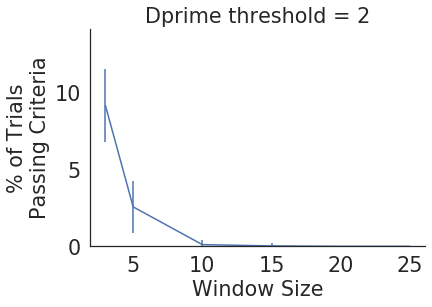

In [55]:
plt.errorbar(window_sizes, mean_pass, yerr=std_pass)
plt.title('Dprime threshold = {}'.format(dp_threshold))
plt.ylim(0,max(mean_pass)+5)
plt.ylabel('% of Trials\nPassing Criteria')
plt.xlabel('Window Size')